A:  [[ 0.79329563 -0.04175675  0.06125231  0.03232194]
 [ 0.47329077  0.7268569   0.06633426  0.60526384]
 [ 0.21675805  0.29915336  0.28861317  0.17640512]
 [-0.09659981  0.53302892 -0.08764319  0.48965804]]
B:  [[0.78994756 0.37365832 0.62235873 0.05831263]
 [0.33746884 0.30339282 0.57455671 0.32107389]
 [0.53546881 0.32909611 0.24082679 0.66641902]
 [0.42536863 0.77393884 0.48531959 0.30889125]]
C:  [[-0.34515604  0.18640011  0.03796738  0.12452631]
 [ 0.35121144 -0.16153282 -0.07815532 -0.11513801]
 [ 0.22225945 -0.03499953 -0.20209305  0.00883211]
 [ 0.30068824 -0.1931253  -0.2189281   0.09151886]]


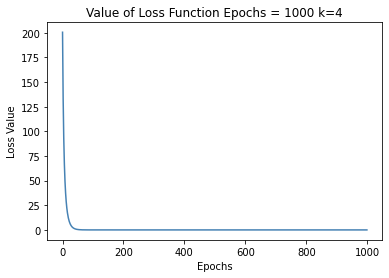

In [22]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(y):
    u = 1.0 / (1.0 + np.exp(-y))
    return u

def back_propagation(k, epochs_list, learning_rate):
    A = np.random.rand(k, k)
    B = np.random.rand(k, k)
    C = np.random.rand(k, k)
    x = np.ones(k)
    Loss_list = []
    for epoch in range(len(epochs_list)):
        y = np.matmul(A, x)
        u = sigmoid(y)
        v = np.matmul(B, x)
        z = u + v
        w = np.matmul(C, z)  # Compute Cz

        Loss = np.sum(np.multiply(w, w))
        Loss_list.append(Loss)

        z_grad = np.eye(k)
        y_grad = sigmoid(y) * (1 - sigmoid(y))

        # Compute gradients
        C_grad = 2 * np.outer(w, z)  # Gradient of L w.r.t. C
        A_grad = 2 * np.outer(np.multiply(np.matmul(C.T, w), sigmoid(y_grad)), x)
        B_grad = 2 * np.outer(np.multiply(np.matmul(C.T, w), sigmoid(y_grad)), x)

        A = A - learning_rate * A_grad
        B = B - learning_rate * B_grad
        C = C - learning_rate * C_grad  # Update C using gradient descent

    print('A: ', A)
    print('B: ', B)
    print('C: ', C)
    return Loss_list

if __name__ == "__main__":
    k = 4
    learning_rate = 0.001
    epochs_list = [epoch for epoch in range(1000)]
    Loss_list = back_propagation(k, epochs_list, learning_rate)

    plt.plot(epochs_list, Loss_list, color='steelblue')
    title = "Value of Loss Function Epochs = 1000"+" k="+str(k)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.show()